In [8]:
# import necessary dependencies
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [9]:
# load preprocessed data
preprocessed_network_data = pd.read_csv('/content/preprocessed_network_data.csv')
preprocessed_network_data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [11]:
def principle_component_analysis(data):
    n_samples, n_features = data.shape
    n_components = min(n_samples, n_features)

    pca = PCA(n_components=min(n_components, 50))
    reduced_data = pca.fit_transform(data)
    return reduced_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=1, WCSS is 10000251.599703468


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, WCSS is 9362043.197905727


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, WCSS is 8924787.450167958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, WCSS is 8583863.841855211


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, WCSS is 8304811.738738138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, WCSS is 8065798.0033648675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, WCSS is 7857836.236419092


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, WCSS is 7674901.224109396


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=9, WCSS is 7511172.471708504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=10, WCSS is 7360948.950868865


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=11, WCSS is 7222274.504171143


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=12, WCSS is 7125882.5140932575


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=13, WCSS is 7031173.590774446


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=14, WCSS is 6938525.474236188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=15, WCSS is 6850757.51564297


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=16, WCSS is 6766146.359338682


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=17, WCSS is 6685047.552193149


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=18, WCSS is 6607126.251425724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=19, WCSS is 6529421.382926682


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=20, WCSS is 6454182.716634611


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=21, WCSS is 6406131.937946382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=22, WCSS is 6358630.1999739185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=23, WCSS is 6310000.664328275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=24, WCSS is 6264945.024862037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=25, WCSS is 6223708.20199186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=26, WCSS is 6180415.811359587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=27, WCSS is 6142790.26675066


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=28, WCSS is 6104817.058277467


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=29, WCSS is 6067197.244111782


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=30, WCSS is 6029320.120371952


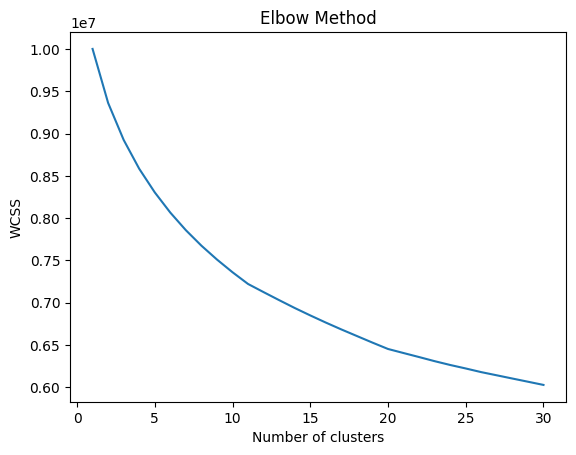

In [10]:
# Determine Optimal Number of Clusters (for K-Means) using Elbow Method
def elbow_method(data):
    reduced_data = principle_component_analysis(data)
    wcss = []
    for i in range(1, 31):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(reduced_data)
        wcss.append(kmeans.inertia_)
        print(f"For n_clusters={i}, WCSS is {kmeans.inertia_}")
    plt.plot(range(1, 31), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show

elbow_method(preprocessed_network_data)

In [2]:
# #Silhouette Score
# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import davies_bouldin_score

# def plot_silhouette_score(data):
#     silhouette_scores = []
#     n_samples, n_features = data.shape
#     n_components = min(n_samples, n_features)

#     pca = PCA(n_components=min(n_components, 50))
#     reduced_data = pca.fit_transform(data)

#     for n_cluster in range(2, 11):
#         print(f"Processing n_clusters={n_cluster}")
#         kmeans = MiniBatchKMeans(n_clusters=n_cluster, init='k-means++', random_state=42, max_iter=300)
#         label = kmeans.fit_predict(reduced_data)
#         # sil_coeff = silhouette_score(reduced_data, label)
#         sil_coeff = davies_bouldin_score(reduced_data, label)
#         silhouette_scores.append(sil_coeff)
#         print(f"For n_clusters={n_cluster}, the Silhouette Coefficient is {sil_coeff}")

#     plt.figure(figsize=(10, 6))
#     plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
#     plt.title('Silhouette Scores for Different Clusters')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('Silhouette Score')

# plot_silhouette_score(preprocessed_network_data)

Processing n_clusters=2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the Davies Bouldin Score is 3.7313498226919197
Processing n_clusters=3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the Davies Bouldin Score is 3.2396554392782115
Processing n_clusters=4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the Davies Bouldin Score is 2.938454677613091
Processing n_clusters=5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the Davies Bouldin Score is 2.7280981109332822
Processing n_clusters=6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the Davies Bouldin Score is 2.5704649717859174
Processing n_clusters=7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the Davies Bouldin Score is 2.4443982284093173
Processing n_clusters=8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the Davies Bouldin Score is 2.344173687954548
Processing n_clusters=9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=9, the Davies Bouldin Score is 2.2623751638235787
Processing n_clusters=10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=10, the Davies Bouldin Score is 2.1892561694627735
Processing n_clusters=11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=11, the Davies Bouldin Score is 2.1241857493567853
Processing n_clusters=12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=12, the Davies Bouldin Score is 2.1351777202511206
Processing n_clusters=13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=13, the Davies Bouldin Score is 2.1011072905906607
Processing n_clusters=14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=14, the Davies Bouldin Score is 2.074753974516193
Processing n_clusters=15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=15, the Davies Bouldin Score is 2.0419727094605182
Processing n_clusters=16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=16, the Davies Bouldin Score is 2.013726106533283
Processing n_clusters=17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=17, the Davies Bouldin Score is 1.981518413642085
Processing n_clusters=18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=18, the Davies Bouldin Score is 1.9460772475313008
Processing n_clusters=19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=19, the Davies Bouldin Score is 1.904355977204584
Processing n_clusters=20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=20, the Davies Bouldin Score is 1.8734218025689036
Processing n_clusters=21


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=21, the Davies Bouldin Score is 1.9380295480122929
Processing n_clusters=22


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=22, the Davies Bouldin Score is 1.9936611283600998
Processing n_clusters=23


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=23, the Davies Bouldin Score is 2.0410969166841952
Processing n_clusters=24


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=24, the Davies Bouldin Score is 2.0873104304324515
Processing n_clusters=25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=25, the Davies Bouldin Score is 2.1064970453661966
Processing n_clusters=26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=26, the Davies Bouldin Score is 2.1391665529519965
Processing n_clusters=27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=27, the Davies Bouldin Score is 2.126347795365905
Processing n_clusters=28


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=28, the Davies Bouldin Score is 2.097399907222873
Processing n_clusters=29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=29, the Davies Bouldin Score is 2.0273307897295676
Processing n_clusters=30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=30, the Davies Bouldin Score is 2.0101979696673467


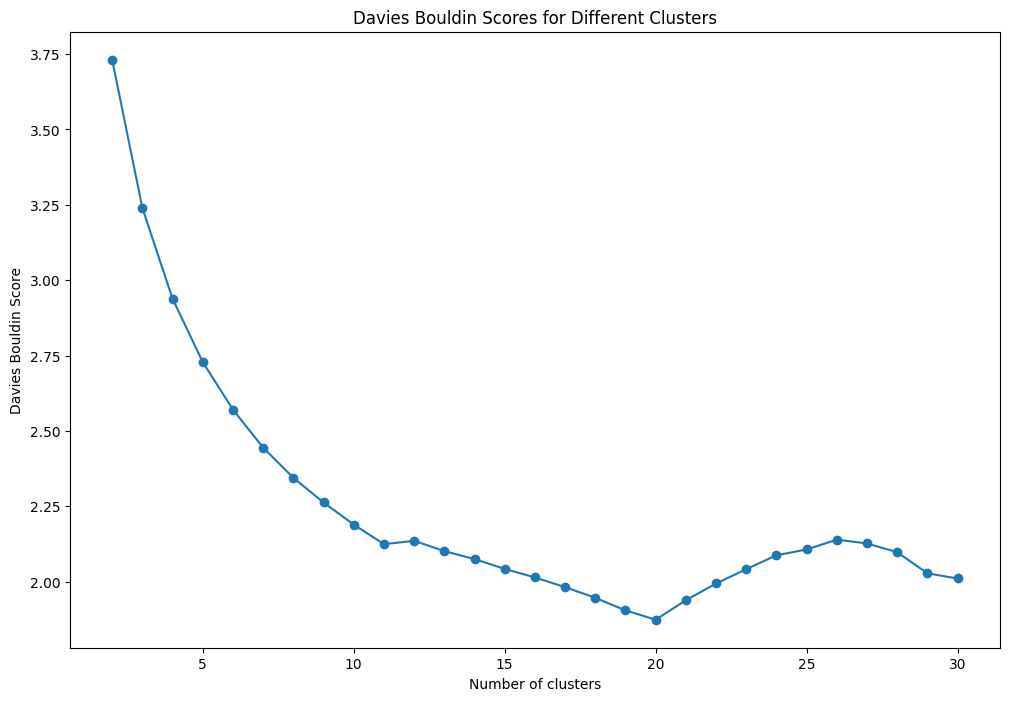

In [7]:
'''From Elbow method, number of cluster is unclear. So, we have to consider another metric to know the optimal number of cluster. Here, I am going to use
Davies Bouldin Score'''

# Davies Bouldin Score
def plot_davies_bouldin_score(data):
  reduced_data = principle_component_analysis(data)
  devies_bouldin_scores = []

  for n_cluster in range(2, 31):
    print(f"Processing n_clusters={n_cluster}")
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42, max_iter=300)
    label = kmeans.fit_predict(reduced_data)
    db_score = davies_bouldin_score(reduced_data, label)
    devies_bouldin_scores.append(db_score)
    print(f"For n_clusters={n_cluster}, the Davies Bouldin Score is {db_score}")

  plt.figure(figsize=(12, 8))
  plt.plot(range(2, 31), devies_bouldin_scores, marker='o', linestyle='-')
  plt.title('Davies Bouldin Scores for Different Clusters')
  plt.xlabel('Number of clusters')
  plt.ylabel('Davies Bouldin Score')

plot_davies_bouldin_score(preprocessed_network_data)

From the graph generated from Davies Bouldin Score, we can clearly see that the optimal number of clusters for KMeans Clustering is 20.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,KMeans_Cluster
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,2
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,5
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,5
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,6
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,5
...,...,...,...,...,...,...,...,...,...,...,...
999995,0.002725,-0.638022,0.840857,1.306959,-0.992010,-0.210795,0.226693,0.948210,0.815519,0.240544,2
999996,-0.830555,-0.545716,-1.130178,0.021732,-0.565860,1.438171,0.621305,-1.768177,1.461799,-0.668388,7
999997,0.047510,-1.310967,0.173328,-1.367077,1.003435,-0.202177,-0.112733,-0.206338,0.086761,-1.954908,7
999998,-0.242768,-0.893310,-0.197664,-1.316390,-0.047899,-0.161381,-0.682240,-0.011741,0.684703,-0.019483,7


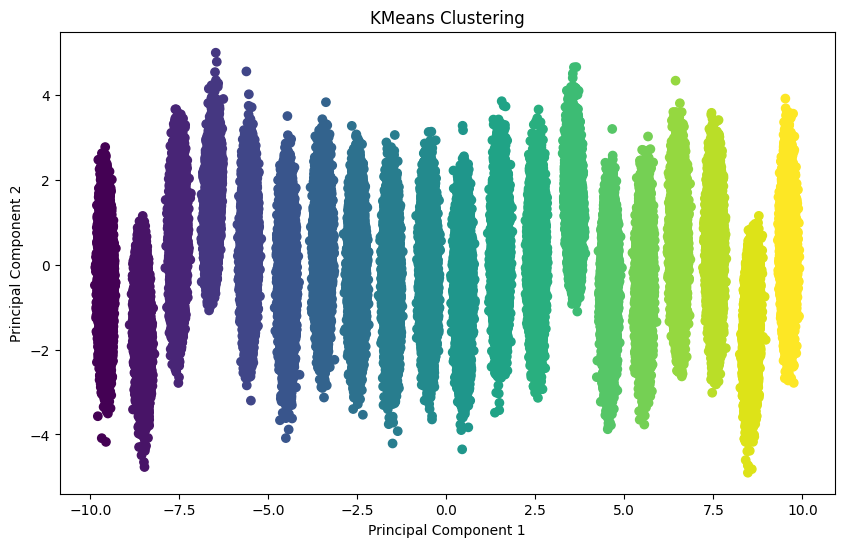

In [14]:
# Function to perform KMeans Clustering
def kmeans_clustering(data):
    optimal_clusters = 20

    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
    label = kmeans.fit_predict(data)
    data['KMeans_Cluster'] = label

    #plot the clusters using the PCA for dimensionality reduction
    reduced_data = principle_component_analysis(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('KMeans Clustering')
    plt.show

    return data

clustered_data = kmeans_clustering(preprocessed_network_data)
clustered_data

In [ ]:
# # Perform KNN to find optimal eps and min_samples for DBSCAN and plotting K-Distance Graph
# def knn_for_dbscan(data):
#     reduced_data = principle_component_analysis(data)
#     min_samples = 5

#     knn = NearestNeighbors(n_neighbors=min_samples)
#     knn.fit(reduced_data)
#     distances, indices = knn.kneighbors(reduced_data)

#     distances = np.sort(distances[:, 10], axis=0)
#     plt.figure(figsize=(10, 6))
#     plt.plot(distances)
#     plt.xlabel('Points sorted by distance')
#     plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
#     plt.title('K-Distance Graph')
#     plt.show()

# knn_for_dbscan(preprocessed_network_data)

In [ ]:
def optimal_eps_for_dbscan(data):
    reduced_data = principle_component_analysis(data)


    # Define ranges for eps and min_samples
    eps_values = np.arange(0.1, 2.0, 0.1)  # Use numpy for floating-point values
    min_samples_range = range(2, 10)

    # Initialize lists to store results
    results = []

    for eps in eps_values:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            label = dbscan.fit_predict(reduced_data)

            # Check if all data points are assigned to a cluster
            if len(set(label)) > 1 and len(set(label)) < len(reduced_data):
                try:
                    # Compute Davies-Bouldin Index
                    dbi = davies_bouldin_score(reduced_data, label)
                    results.append((eps, min_samples, dbi))
                except Exception as e:
                    print(f"Error for eps={eps}, min_samples={min_samples}: {e}")
                    continue

    # Convert results to a numpy array for easier plotting
    results = np.array(results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(results[:, 0], results[:, 1], c=results[:, 2], cmap='viridis', s=100)
    plt.xlabel('eps')
    plt.ylabel('min_samples')
    plt.colorbar(label='Davies-Bouldin Index')
    plt.title('Grid Search Results for DBSCAN (Davies-Bouldin Index)')
    plt.show()

optimal_eps_for_dbscan(preprocessed_network_data)

In [15]:
def optimal_eps_for_dbscan2(data):
    reduced_data = principle_component_analysis(data)

    sample_indices = np.random.choice(reduced_data.shape[0], size=10000, replace=False)
    reduced_data_sample = reduced_data[sample_indices]

    # Define ranges for eps and min_samples
    eps_values = np.linspace(0.8, 1.2, 11)
    min_samples_values = range(3, 7)

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(reduced_data_sample)

            # Print or visualize clustering results
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
            print(f"eps: {eps}, min_samples: {min_samples}, clusters found: {num_clusters}")

optimal_eps_for_dbscan2(preprocessed_network_data)

eps: 0.8, min_samples: 3, clusters found: 1
eps: 0.8, min_samples: 4, clusters found: 0
eps: 0.8, min_samples: 5, clusters found: 0
eps: 0.8, min_samples: 6, clusters found: 0
eps: 0.8400000000000001, min_samples: 3, clusters found: 2
eps: 0.8400000000000001, min_samples: 4, clusters found: 0
eps: 0.8400000000000001, min_samples: 5, clusters found: 0
eps: 0.8400000000000001, min_samples: 6, clusters found: 0
eps: 0.88, min_samples: 3, clusters found: 3
eps: 0.88, min_samples: 4, clusters found: 0
eps: 0.88, min_samples: 5, clusters found: 0
eps: 0.88, min_samples: 6, clusters found: 0
eps: 0.92, min_samples: 3, clusters found: 6
eps: 0.92, min_samples: 4, clusters found: 1
eps: 0.92, min_samples: 5, clusters found: 0
eps: 0.92, min_samples: 6, clusters found: 0
eps: 0.96, min_samples: 3, clusters found: 11
eps: 0.96, min_samples: 4, clusters found: 1
eps: 0.96, min_samples: 5, clusters found: 0
eps: 0.96, min_samples: 6, clusters found: 0
eps: 1.0, min_samples: 3, clusters found: 38
ep

From Above optimal_eps_for_dbscan2() function's result, we can clearly see that we have 196 clusters for eps: 1.2 and min_sample: 3, which is the greatest number of clusters.

Number of Anomalies Detected: 109189


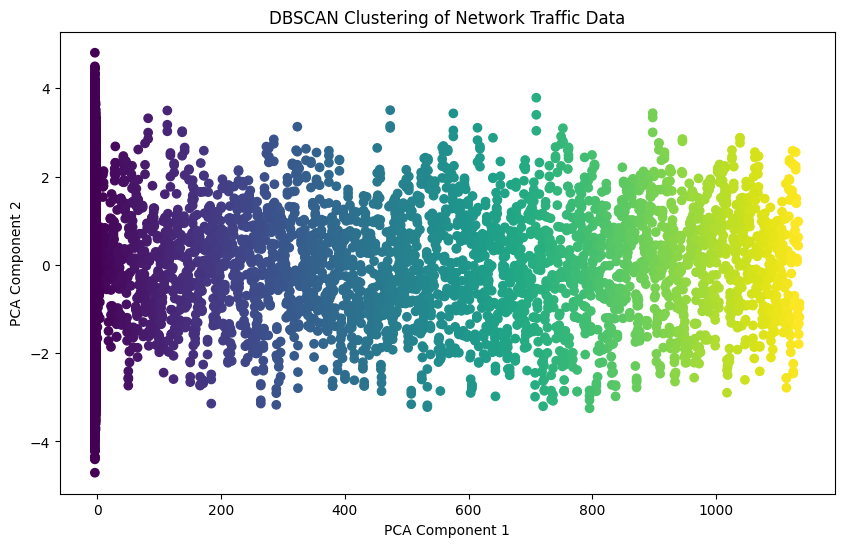

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,DBSCAN_Cluster
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0
...,...,...,...,...,...,...,...,...,...,...,...
777181,-0.464555,0.293702,-2.577440,-0.870566,-1.144649,2.046152,0.308274,0.475824,-0.833009,-0.890319,0
777182,-0.926091,-0.144859,-0.806607,-0.540566,-1.434923,-1.174033,0.521779,0.652676,2.715838,-0.296689,0
777183,1.241302,1.621717,1.441108,0.315583,0.390029,-0.271153,-0.833095,-0.594180,1.026931,0.678680,0
777184,0.216020,1.721128,0.466780,0.815554,2.812837,-0.152696,-0.032988,0.547649,1.840334,0.079655,-1


In [16]:
# Using DBSCAN FOR Anomaly detection
def dbscan_clustering(data):
    dbscan = DBSCAN(eps=1.2, min_samples=3)
    data['DBSCAN_Cluster'] = dbscan.fit_predict(data)

    # Identifying anomalies (DBSCAN labels anomalies as -1)
    anomalies = data[data['DBSCAN_Cluster'] == -1]
    print(f"Number of Anomalies Detected: {len(anomalies)}")

    reduced_data = principle_component_analysis(data)

    # Plotting DBSCAN results
    plt.title('DBSCAN Clustering of Network Traffic Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    return data

dbscan_clustered_data = dbscan_clustering(preprocessed_network_data)
dbscan_clustered_data

In [17]:
# Saving DBSCAN clustered data
dbscan_clustered_data.to_csv('/content/dbscan_clustered_data.csv', index=False)

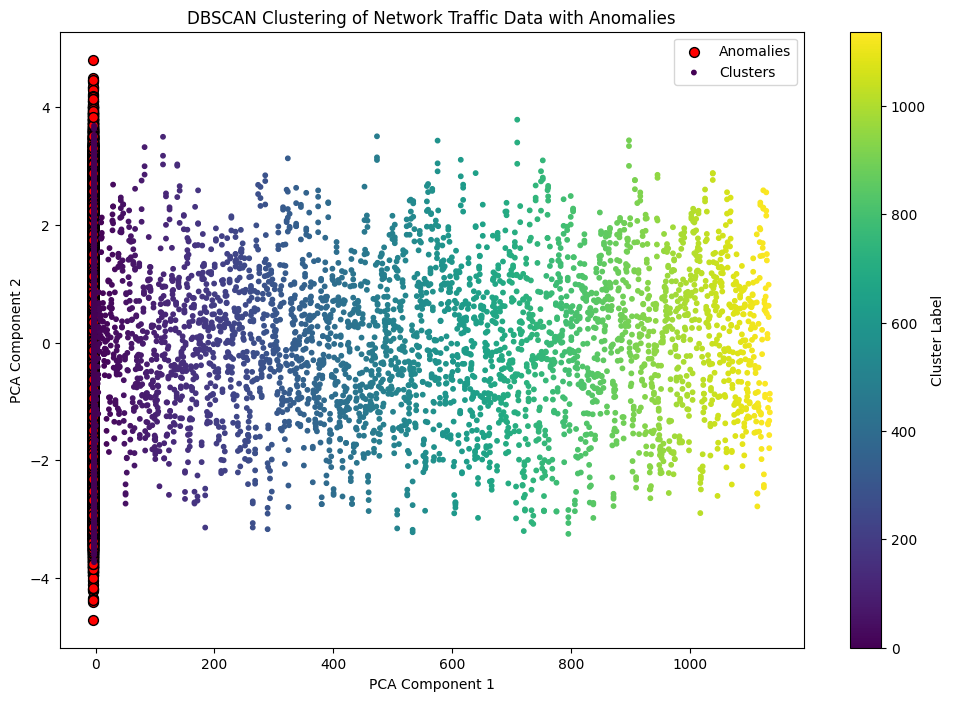

In [18]:
# Plotting the Anomalies and clusters
def plot_anomalies(data):
    reduced_data = principle_component_analysis(data)

    # Add PCA components to the DataFrame
    data['PCA1'] = reduced_data[:, 0]
    data['PCA2'] = reduced_data[:, 1]

    # Identifying anomalies and clusters
    anomalies = data[data['DBSCAN_Cluster'] == -1]
    clusters = data[data['DBSCAN_Cluster'] != -1]

    # Plotting DBSCAN results
    plt.figure(figsize=(12, 8))

    # Plot anomalies in red
    plt.scatter(anomalies['PCA1'], anomalies['PCA2'], color='red', s=50, label='Anomalies', edgecolor='black')

    # Plot clusters with different colors
    scatter_clusters = plt.scatter(clusters['PCA1'], clusters['PCA2'], c=clusters['DBSCAN_Cluster'], cmap='viridis', marker='o', s=10, label='Clusters')

    # Add a colorbar to show the cluster labels
    plt.colorbar(scatter_clusters, label='Cluster Label')

    # Title and labels
    plt.title('DBSCAN Clustering of Network Traffic Data with Anomalies')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

plot_anomalies(dbscan_clustered_data)